# Evaluation Baseline/one dataset
In this section, we aim to evaluate Experiment 1.
First, we will assess our results using the improved method, followed by an evaluation of the exact replication results.

In [3]:
# dependecies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# data
results_german = pd.read_csv(r'german_results.csv')
results_english = pd.read_csv(r'english_results.csv')
results_italian = pd.read_csv(r'italian_results.csv')
results_urdu = pd.read_csv(r'urdu_results.csv')

# replication of paper
replication_results_german = pd.read_csv(r'german_replication_results.csv')
replication_results_english = pd.read_csv(r'english_replication_results.csv')
replication_results_italian = pd.read_csv(r'italian_replication_results.csv')
replication_results_urdu = pd.read_csv(r'urdu_replication_results.csv')


In [5]:
def plot_results(results_df, language):
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")
    sns.set_palette("viridis")
    sns.barplot(data=results_df, x="Metric", y="Score", hue="Model")

    # Add labels and title
    plt.title(language + ': Model Performance on Different Metrics', fontsize=16)
    plt.xlabel('Metric', fontsize=12)
    plt.ylabel('Score', fontsize=12)

    plt.legend(title="Model", bbox_to_anchor=(1.05, 0.5), loc='center left')
    # Display the plot
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

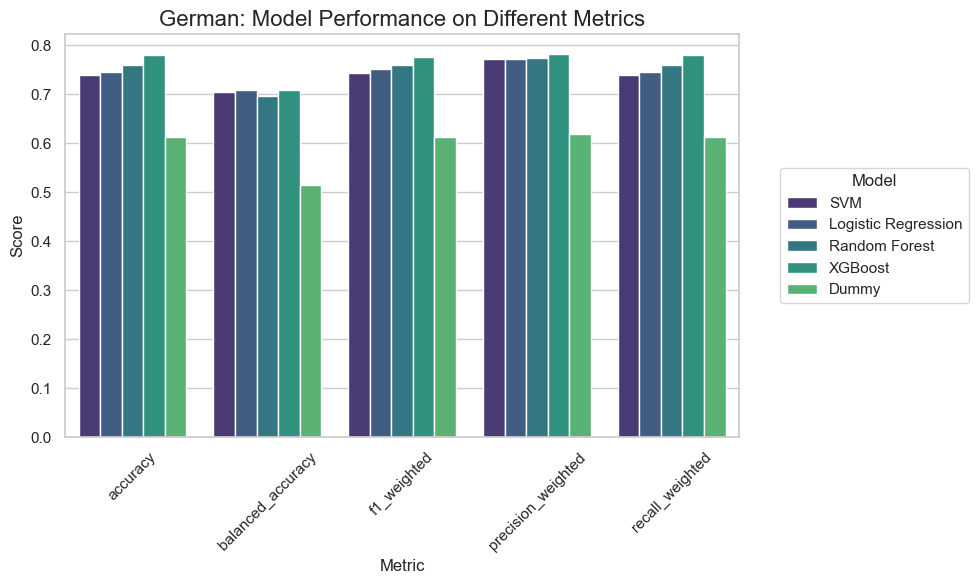

In [6]:
plot_results(results_german, 'German')


We observe different models with varying scores.
All models perform better than the dummy model, indicating that they outperform random classification.
As expected, XGBoost outperforms the other models.
We can conclude, that we can classify German emotions into negative and positive valence.

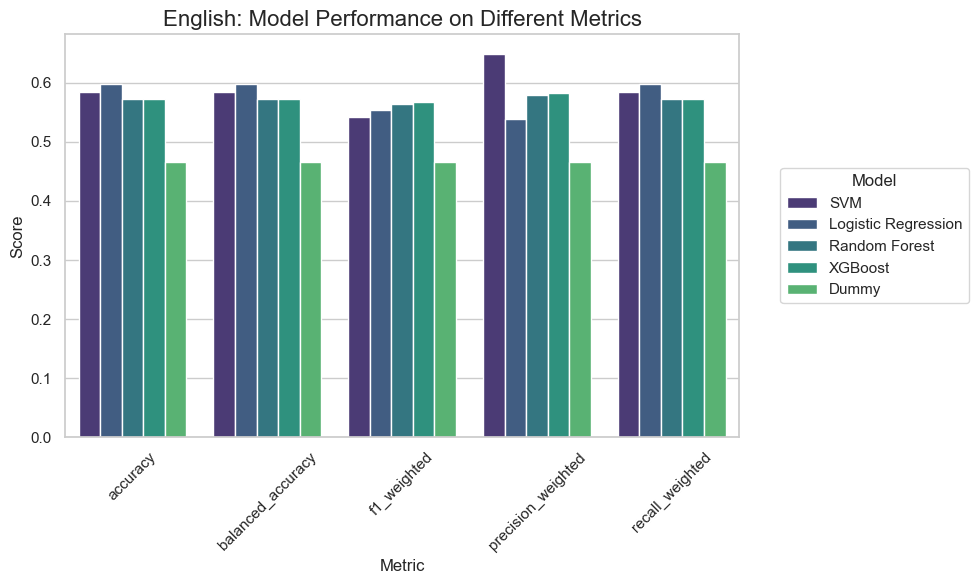

In [7]:
plot_results(results_english, 'English')


Here, too, all models outperform the dummy model.

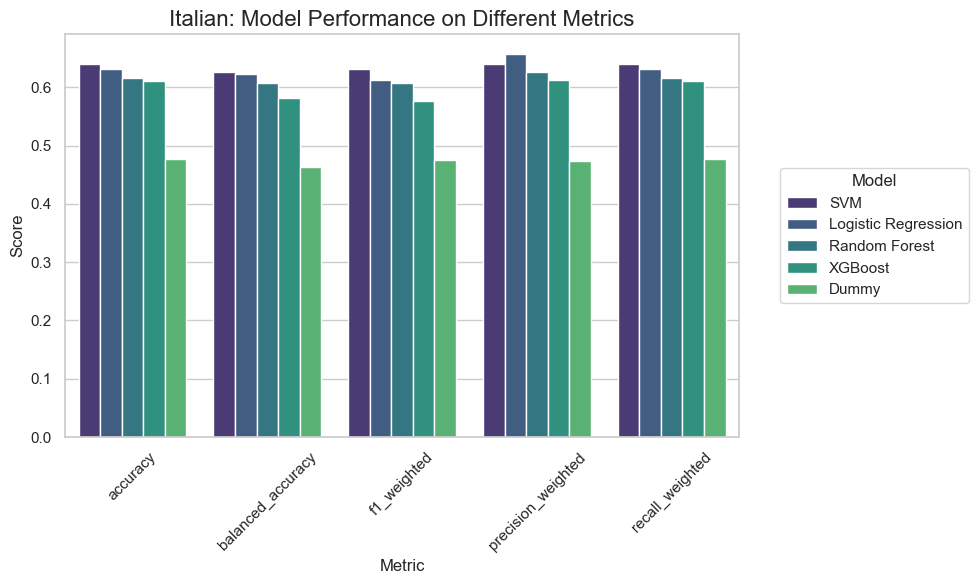

In [8]:
plot_results(results_italian, 'Italian')
  

Here, too, all models outperform the dummy model.

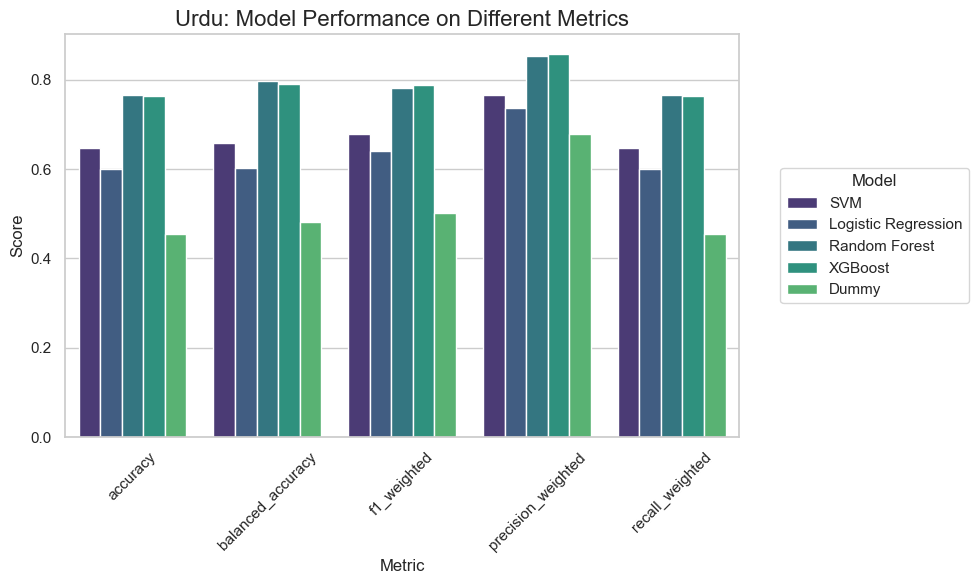

In [9]:
plot_results(results_urdu, 'Urdu')  

Here, too, all models outperform the dummy model. The other models perfoem quite different, with the tree-based models performing particularly well.

In the following we want to compare the different languages. 
As the paper used balanced accurcy we will do it aswell for the comparison plot.

In [10]:
# combine results
dfs = [results_german, results_english, results_italian, results_urdu]
names = ['German', 'English', 'Italian', 'Urdu']
combined_df = pd.concat(
        [df.assign(Dataset=name) for df, name in zip(dfs, names)],
        ignore_index=True
    )

df_accuracy = combined_df[combined_df["Metric"] == "balanced_accuracy"]


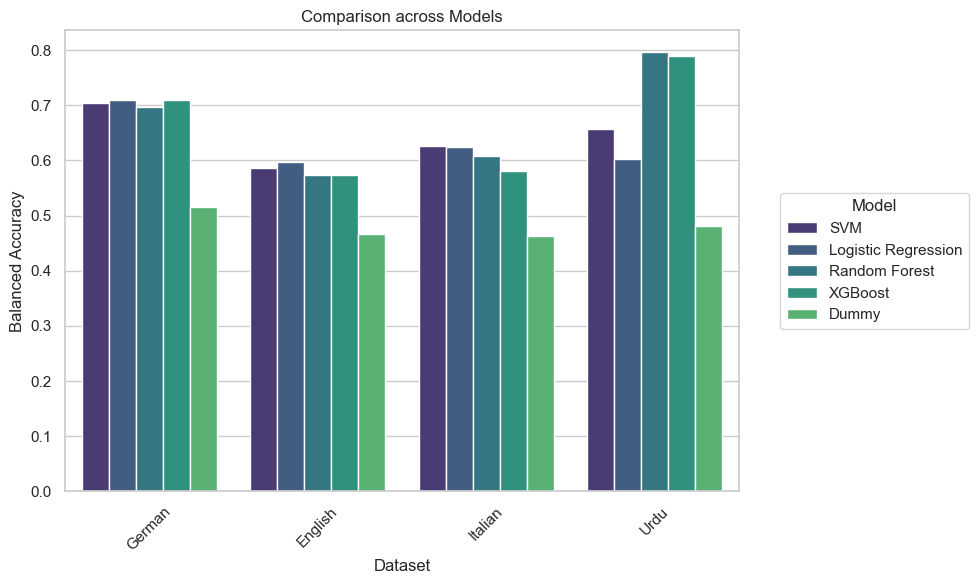

In [11]:
# plot for comparison
sns.set_theme(style="whitegrid")
sns.set_palette("viridis")
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Score', hue='Model', data=df_accuracy)

plt.title('Comparison across Models')
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.xlabel('Dataset', fontsize=12)
plt.legend(title='Model', bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Overall

### Exact Replication of Paper

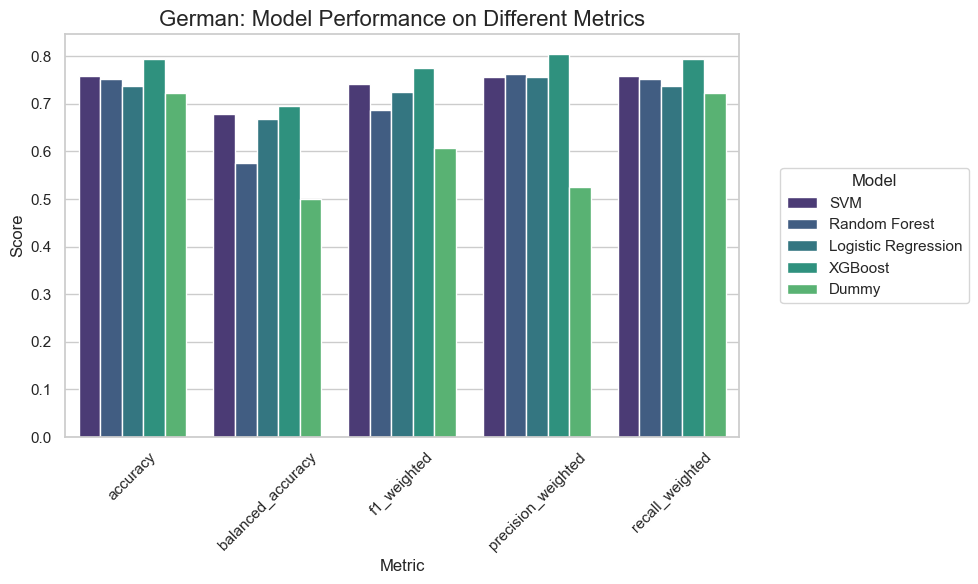

In [12]:
plot_results(replication_results_german, 'German')  

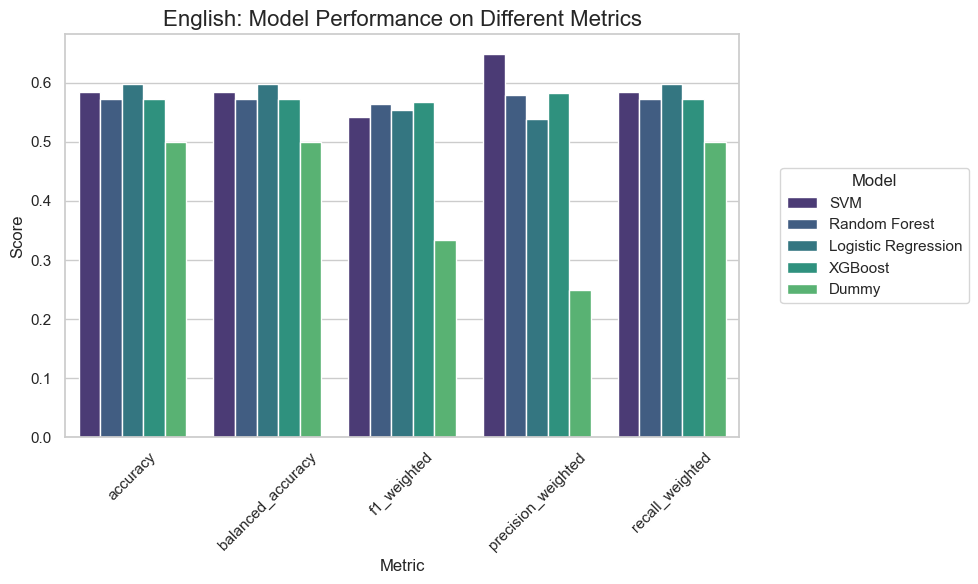

In [13]:
plot_results(replication_results_english, 'English')

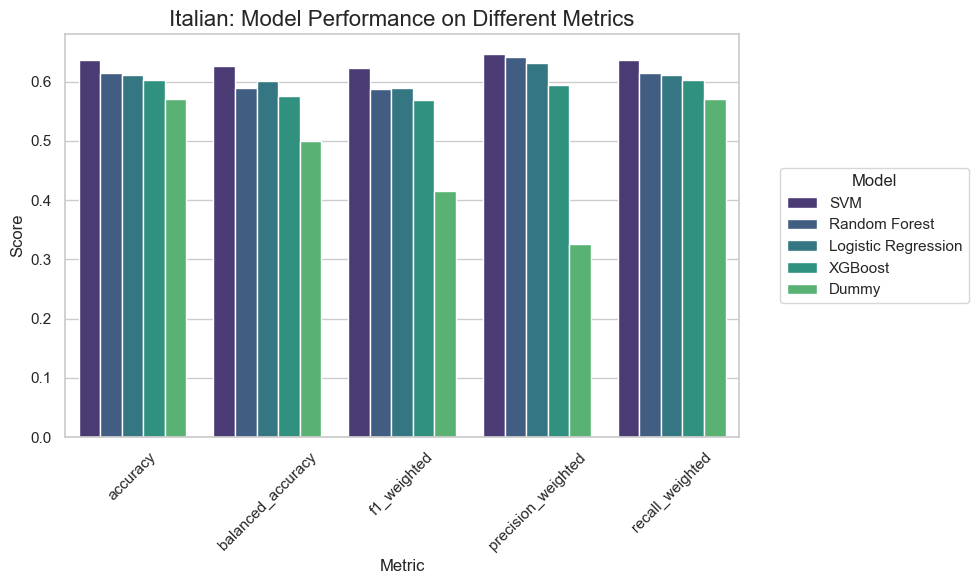

In [14]:
plot_results(replication_results_italian, 'Italian')

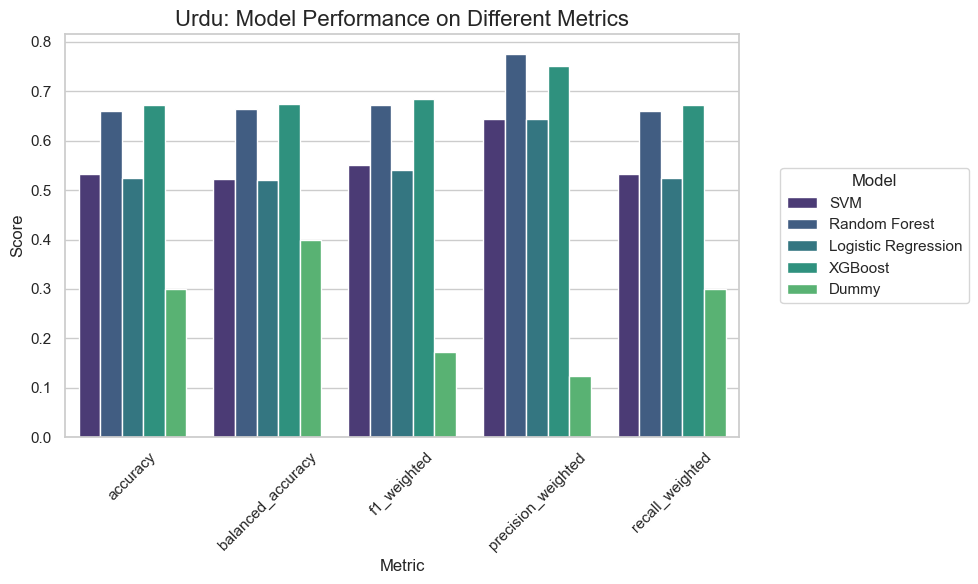

In [15]:
plot_results(replication_results_urdu, 'Urdu')

In [16]:
# combine results
dfs = [replication_results_german, replication_results_english, replication_results_italian, replication_results_urdu]
names = ['German', 'English', 'Italian', 'Urdu']
combined_df = pd.concat(
        [df.assign(Dataset=name) for df, name in zip(dfs, names)],
        ignore_index=True
    )

df_accuracy = combined_df[combined_df["Metric"] == "balanced_accuracy"]


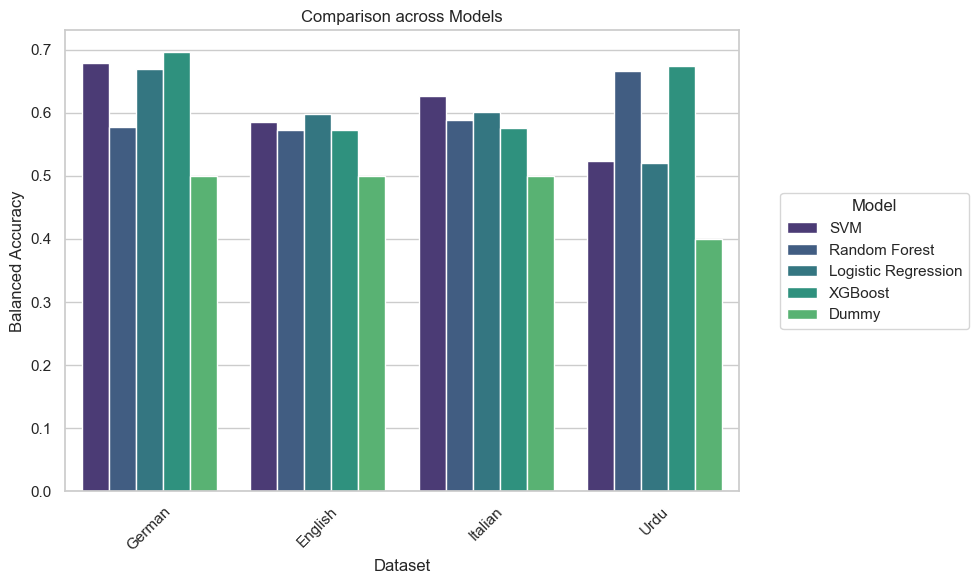

In [17]:
# plot for comparison
sns.set_theme(style="whitegrid")
sns.set_palette("viridis")
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Score', hue='Model', data=df_accuracy)

plt.title('Comparison across Models')
plt.ylabel('Balanced Accuracy', fontsize=12)
plt.xlabel('Dataset', fontsize=12)
plt.legend(title='Model', bbox_to_anchor=(1.05, 0.5), loc='center left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

All models outperform the dummy model, indicating that they perform better than random classification.
SVM demonstrated superior performance compared to the other models in German, English, and Italian, which aligns with the results presented in the paper.
However, the results we obtained differ considerably from those in the paper, particularly for Urdu.
We attribute these discrepancies to the fact that we did not have access to the complete dataset, as fewer speakers were uploaded than originally indicated.
Moreover, it remains unclear how the models in the paper were tuned.

Given our belief in the superiority of our method, we employed it for subsequent analyses. Additionally, instead of SVM, we explored the performance of XGBoost.

# Conclusion

We can see that emotion detection for all four languages performs better than the random baseline, with accuracy ranging between 0.5 and 0.7. While we were able to replicate the basic results, we could not match the exact outcomes from the paper.  
The results of our improved baseline model outperform the replicated version.